# Importing Data and Basic Cleaning
* Data from:
    >https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
* Filtered to only get data from 2014-2018
* Examining data, spltting date column into features like month/day/day of week/year
* Removing any rows with null values

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
# Import Chicago crime dataset
file = 'data/Crimes_-_2001_to_present.csv'
df = pd.read_csv(file)

In [3]:
# Double check years for data pulled from Chicago website - if it matches the filter input when downloading data
df['Year'].unique()

array([2017, 2015, 2014, 2016, 2018])

In [4]:
# Convert column to datetime
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
1,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227503,JB146383,2015-01-01 00:01:00,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,...,13.0,65.0,17,NaN,NaN,2015,04/12/2019 04:00:15 PM,NaN,NaN,NaN


In [5]:
# Breaking down datetime into multiple features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek
df['HourOfDay'] = df['Date'].dt.hour
df = df.sort_values('Date')

In [6]:
# Check for null values
df.count()

ID                      1343272
Case Number             1343272
Date                    1343272
Block                   1343272
IUCR                    1343272
Primary Type            1343272
Description             1343272
Location Description    1339597
Arrest                  1343272
Domestic                1343272
Beat                    1343272
District                1343271
Ward                    1343264
Community Area          1343270
FBI Code                1343272
X Coordinate            1327324
Y Coordinate            1327324
Year                    1343272
Updated On              1343272
Latitude                1327324
Longitude               1327324
Location                1327324
Month                   1343272
Day                     1343272
Weekday                 1343272
HourOfDay               1343272
dtype: int64

In [7]:
# Dropping any rows with null values
null_df = df.dropna()
null_df.count()

ID                      1324815
Case Number             1324815
Date                    1324815
Block                   1324815
IUCR                    1324815
Primary Type            1324815
Description             1324815
Location Description    1324815
Arrest                  1324815
Domestic                1324815
Beat                    1324815
District                1324815
Ward                    1324815
Community Area          1324815
FBI Code                1324815
X Coordinate            1324815
Y Coordinate            1324815
Year                    1324815
Updated On              1324815
Latitude                1324815
Longitude               1324815
Location                1324815
Month                   1324815
Day                     1324815
Weekday                 1324815
HourOfDay               1324815
dtype: int64

In [8]:
null_df['Primary Type'].value_counts()

THEFT                                306694
BATTERY                              247338
CRIMINAL DAMAGE                      143951
ASSAULT                               92192
NARCOTICS                             88042
OTHER OFFENSE                         85343
DECEPTIVE PRACTICE                    80367
BURGLARY                              66571
ROBBERY                               52929
MOTOR VEHICLE THEFT                   52500
CRIMINAL TRESPASS                     33901
WEAPONS VIOLATION                     20017
OFFENSE INVOLVING CHILDREN            10882
PUBLIC PEACE VIOLATION                 9775
CRIM SEXUAL ASSAULT                    7150
INTERFERENCE WITH PUBLIC OFFICER       6025
PROSTITUTION                           5196
SEX OFFENSE                            4705
HOMICIDE                               2980
ARSON                                  2181
LIQUOR LAW VIOLATION                   1369
GAMBLING                               1284
KIDNAPPING                      

# Cleaning the Data in Primary Type and Description Columns
* First look through primary types for similar types that can be combined
* Use Description column to distingiush between simple/aggravated crimes - clean up and combine
* IUCR codes and crime descriptions can be found here:
    > http://gis.chicagopolice.org/CLEARMap_crime_sums/crime_types.html

In [9]:
# Combine similar offense types in Primary Type column
null_df.loc[(null_df['Primary Type'] =='NON - CRIMINAL'), 'Primary Type'] = 'NON-CRIMINAL'
null_df.loc[(null_df['Primary Type'] =='NON-CRIMINAL (SUBJECT SPECIFIED)'), 'Primary Type'] = 'NON-CRIMINAL'

/anaconda3/envs/bigdata/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
# Checking IUCR against chicago police to decide where to combine columns
    # Drop non-criminal from dataframe
iucr_df = null_df.loc[null_df['Primary Type'] == 'NON-CRIMINAL']
iucr_df['Description'].value_counts()

LOST PASSPORT                                  93
FOID - REVOCATION                              71
NOTIFICATION OF STALKING - NO CONTACT ORDER     8
NOTIFICATION OF CIVIL NO CONTACT ORDER          7
CONCEALED CARRY LICENSE REVOCATION              5
GUN OFFENDER NOTIFICATION-NO CONTACT            3
FOUND PASSPORT                                  3
Name: Description, dtype: int64

In [11]:
null_df = null_df[null_df['Primary Type'] != 'NON-CRIMINAL']

In [12]:
null_df['Primary Type'].value_counts()

THEFT                                306694
BATTERY                              247338
CRIMINAL DAMAGE                      143951
ASSAULT                               92192
NARCOTICS                             88042
OTHER OFFENSE                         85343
DECEPTIVE PRACTICE                    80367
BURGLARY                              66571
ROBBERY                               52929
MOTOR VEHICLE THEFT                   52500
CRIMINAL TRESPASS                     33901
WEAPONS VIOLATION                     20017
OFFENSE INVOLVING CHILDREN            10882
PUBLIC PEACE VIOLATION                 9775
CRIM SEXUAL ASSAULT                    7150
INTERFERENCE WITH PUBLIC OFFICER       6025
PROSTITUTION                           5196
SEX OFFENSE                            4705
HOMICIDE                               2980
ARSON                                  2181
LIQUOR LAW VIOLATION                   1369
GAMBLING                               1284
KIDNAPPING                      

In [13]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine with narcotics
iucr_df = null_df.loc[null_df['Primary Type'] == 'OTHER NARCOTIC VIOLATION']
iucr_df['Description'].value_counts()

INTOXICATING COMPOUNDS    31
Name: Description, dtype: int64

In [14]:
null_df.loc[(null_df['Primary Type'] =='OTHER NARCOTIC VIOLATION'), 'Primary Type'] = 'NARCOTICS'

In [15]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine with weapons, change description to concealed carry violation
iucr_df = null_df.loc[null_df['Primary Type'] == 'CONCEALED CARRY LICENSE VIOLATION']
iucr_df['Description'].value_counts()

PROHIBITED PLACES                  119
ARMED WHILE UNDER THE INFLUENCE     93
OTHER                               89
Name: Description, dtype: int64

In [16]:
null_df.loc[(null_df['Primary Type'] =='CONCEALED CARRY LICENSE VIOLATION'), 'Description'] = 'CONCEALED CARRY LICENSE VIOLATION'

In [17]:
null_df.loc[(null_df['Primary Type'] =='CONCEALED CARRY LICENSE VIOLATION'), 'Primary Type'] = 'WEAPONS VIOLATION'

In [18]:
null_df['Primary Type'].value_counts()

THEFT                               306694
BATTERY                             247338
CRIMINAL DAMAGE                     143951
ASSAULT                              92192
NARCOTICS                            88073
OTHER OFFENSE                        85343
DECEPTIVE PRACTICE                   80367
BURGLARY                             66571
ROBBERY                              52929
MOTOR VEHICLE THEFT                  52500
CRIMINAL TRESPASS                    33901
WEAPONS VIOLATION                    20318
OFFENSE INVOLVING CHILDREN           10882
PUBLIC PEACE VIOLATION                9775
CRIM SEXUAL ASSAULT                   7150
INTERFERENCE WITH PUBLIC OFFICER      6025
PROSTITUTION                          5196
SEX OFFENSE                           4705
HOMICIDE                              2980
ARSON                                 2181
LIQUOR LAW VIOLATION                  1369
GAMBLING                              1284
KIDNAPPING                             972
STALKING   

In [19]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine with sex offense
iucr_df = null_df.loc[null_df['Primary Type'] == 'OBSCENITY']
iucr_df['IUCR'].value_counts()

1540    177
1541     64
1535     54
Name: IUCR, dtype: int64

In [20]:
# Checking IUCR against chicago police to decide where to combine columns
    # Do not combine with sex offense
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT']
iucr_df['IUCR'].value_counts()

0281    4612
0265     944
0266     566
0291     354
0261     310
0263     186
0264      75
0275      55
0271      22
0273      15
0274       5
0262       5
0272       1
Name: IUCR, dtype: int64

In [21]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine with sex offense, set description to public indecency
iucr_df = null_df.loc[null_df['Primary Type'] == 'PUBLIC INDECENCY']
iucr_df['IUCR'].value_counts()

1536    58
Name: IUCR, dtype: int64

In [22]:
# Set Public indecency to Description, then combine with Sex Offense
null_df.loc[(null_df['Primary Type'] =='PUBLIC INDECENCY'), 'Description'] = 'PUBLIC INDECENCY'

In [23]:
# Combine Obscenity, Public Indecency with Sex Offense
null_df.loc[(null_df['Primary Type'] =='PUBLIC INDECENCY'), 'Primary Type'] = 'SEX OFFENSE'
null_df.loc[(null_df['Primary Type'] =='OBSCENITY'), 'Primary Type'] = 'SEX OFFENSE'

In [24]:
null_df['Primary Type'].value_counts()

THEFT                               306694
BATTERY                             247338
CRIMINAL DAMAGE                     143951
ASSAULT                              92192
NARCOTICS                            88073
OTHER OFFENSE                        85343
DECEPTIVE PRACTICE                   80367
BURGLARY                             66571
ROBBERY                              52929
MOTOR VEHICLE THEFT                  52500
CRIMINAL TRESPASS                    33901
WEAPONS VIOLATION                    20318
OFFENSE INVOLVING CHILDREN           10882
PUBLIC PEACE VIOLATION                9775
CRIM SEXUAL ASSAULT                   7150
INTERFERENCE WITH PUBLIC OFFICER      6025
PROSTITUTION                          5196
SEX OFFENSE                           5058
HOMICIDE                              2980
ARSON                                 2181
LIQUOR LAW VIOLATION                  1369
GAMBLING                              1284
KIDNAPPING                             972
STALKING   

In [25]:
# Checking IUCR against chicago police to decide where to combine columns
    # From description fits best with prostitution
iucr_df = null_df.loc[null_df['Primary Type'] == 'HUMAN TRAFFICKING']
iucr_df['Description'].value_counts()

COMMERCIAL SEX ACTS      26
INVOLUNTARY SERVITUDE    22
Name: Description, dtype: int64

In [26]:
# Set Human Trafficking description to human trafficking
null_df.loc[(null_df['Primary Type'] =='HUMAN TRAFFICKING'), 'Description'] = 'HUMAN TRAFFICKING'

In [27]:
# Combine Human Trafficking with Prostitution
null_df.loc[(null_df['Primary Type'] =='HUMAN TRAFFICKING'), 'Primary Type'] = 'PROSTITUTION'

In [28]:
null_df['Primary Type'].value_counts()

THEFT                               306694
BATTERY                             247338
CRIMINAL DAMAGE                     143951
ASSAULT                              92192
NARCOTICS                            88073
OTHER OFFENSE                        85343
DECEPTIVE PRACTICE                   80367
BURGLARY                             66571
ROBBERY                              52929
MOTOR VEHICLE THEFT                  52500
CRIMINAL TRESPASS                    33901
WEAPONS VIOLATION                    20318
OFFENSE INVOLVING CHILDREN           10882
PUBLIC PEACE VIOLATION                9775
CRIM SEXUAL ASSAULT                   7150
INTERFERENCE WITH PUBLIC OFFICER      6025
PROSTITUTION                          5244
SEX OFFENSE                           5058
HOMICIDE                              2980
ARSON                                 2181
LIQUOR LAW VIOLATION                  1369
GAMBLING                              1284
KIDNAPPING                             972
STALKING   

In [29]:
# Checking IUCR against chicago police to decide where to combine columns
    # Public Peace Violation different from Interference with Public Officer
iucr_df = null_df.loc[null_df['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER']
iucr_df['IUCR'].value_counts()

3731    3681
3710    1652
3730     380
3760     149
3800      76
3750      61
3910      14
3920       5
3740       3
3751       2
3770       1
3720       1
Name: IUCR, dtype: int64

In [30]:
# Checking IUCR against chicago police to decide where to combine columns
    # Leave intimidation separate unless too many features in random forest
iucr_df = null_df.loc[null_df['Primary Type'] == 'INTIMIDATION']
iucr_df['Description'].value_counts()

INTIMIDATION                                455
EXTORTION                                   214
EDUCATIONAL INTIMIDAITON                      4
INTIMIDATION OF LAW ENFORCEMENT OFFICIAL      4
COMPELLING ORG MEMBERSHIP                     4
COMPELLING CONFESSION                         2
Name: Description, dtype: int64

In [31]:
# Combining similar descriptions within intimidation
null_df.loc[(null_df['Description'] =='INTIMIDATION OF LAW ENFORCEMENT OFFICIAL'), 'Description'] = 'INTIMIDATION'
null_df.loc[(null_df['Description'] =='EDUCATIONAL INTIMIDAITON'), 'Description'] = 'INTIMIDATION'
null_df.loc[(null_df['Description'] =='COMPELLING ORG MEMBERSHIP'), 'Description'] = 'INTIMIDATION'
null_df.loc[(null_df['Description'] =='COMPELLING CONFESSION'), 'Description'] = 'INTIMIDATION'

In [32]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'INTIMIDATION']
iucr_df['Description'].value_counts()

INTIMIDATION    469
EXTORTION       214
Name: Description, dtype: int64

In [33]:
# Checking IUCR against chicago police to decide where to combine columns
    # Leave stalking separate unless too many features in random forest
iucr_df = null_df.loc[null_df['Primary Type'] == 'STALKING']
iucr_df['Description'].value_counts()

SIMPLE                                    639
CYBERSTALKING                             101
VIOLATION OF STALKING NO CONTACT ORDER     93
AGGRAVATED                                 12
Name: Description, dtype: int64

In [34]:
# Checking IUCR against chicago police to decide where to combine columns
    # Leave kidnapping separate unless too many features in random forest
iucr_df = null_df.loc[null_df['Primary Type'] == 'KIDNAPPING']
iucr_df['Description'].value_counts()

CHILD ABDUCTION/STRANGER         383
UNLAWFUL INTERFERE/VISITATION    273
UNLAWFUL RESTRAINT               169
KIDNAPPING                        89
AGGRAVATED                        45
FORCIBLE DETENTION                13
Name: Description, dtype: int64

In [35]:
# Checking IUCR against chicago police to decide where to combine columns
    # Leave gambling separate unless too many features in random forest
iucr_df = null_df.loc[null_df['Primary Type'] == 'GAMBLING']
iucr_df['Description'].value_counts()

GAME/DICE                1200
GAME/AMUSEMENT DEVICE      36
OTHER                      33
GAME/CARDS                 15
Name: Description, dtype: int64

In [36]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine minor posession/consumption and age misrepresent
iucr_df = null_df.loc[null_df['Primary Type'] == 'LIQUOR LAW VIOLATION']
iucr_df['Description'].value_counts()

LIQUOR LICENSE VIOLATION         649
SELL/GIVE/DEL LIQUOR TO MINOR    311
ILLEGAL POSSESSION BY MINOR      268
ILLEGAL CONSUMPTION BY MINOR     137
MINOR MISREPRESENT AGE             4
Name: Description, dtype: int64

In [37]:
# Combining similar minor descriptions within liquor laws
null_df.loc[(null_df['Description'] =='ILLEGAL POSSESSION BY MINOR'), 'Description'] = 'ILLEGAL POSSESSION/CONSUMPTION BY MINOR'
null_df.loc[(null_df['Description'] =='ILLEGAL CONSUMPTION BY MINOR'), 'Description'] = 'ILLEGAL POSSESSION/CONSUMPTION BY MINOR'
null_df.loc[(null_df['Description'] =='MINOR MISREPRESENT AGE'), 'Description'] = 'ILLEGAL POSSESSION/CONSUMPTION BY MINOR'

In [38]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine minor posession/consumption and age misrepresent
iucr_df = null_df.loc[null_df['Primary Type'] == 'LIQUOR LAW VIOLATION']
iucr_df['Description'].value_counts()

LIQUOR LICENSE VIOLATION                   649
ILLEGAL POSSESSION/CONSUMPTION BY MINOR    409
SELL/GIVE/DEL LIQUOR TO MINOR              311
Name: Description, dtype: int64

In [39]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine possesion descriptions
iucr_df = null_df.loc[null_df['Primary Type'] == 'ARSON']
iucr_df['Description'].value_counts()

BY FIRE                          1565
AGGRAVATED                        315
ATTEMPT ARSON                     270
BY EXPLOSIVE                       16
POS: EXPLOSIVE/INCENDIARY DEV      14
POS: CHEMICAL/DRY-ICE DEVICE        1
Name: Description, dtype: int64

In [40]:
# Combining similar device posession in arson
null_df.loc[(null_df['Description'] =='POS: EXPLOSIVE/INCENDIARY DEV'), 'Description'] = 'POSSESION OF EXPLOSIVE DEVICE'
null_df.loc[(null_df['Description'] =='POS: CHEMICAL/DRY-ICE DEVICE'), 'Description'] = 'POSSESION OF EXPLOSIVE DEVICE'

In [41]:
# Checking IUCR against chicago police to decide where to combine columns
    # Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'ARSON']
iucr_df['Description'].value_counts()

BY FIRE                          1565
AGGRAVATED                        315
ATTEMPT ARSON                     270
BY EXPLOSIVE                       16
POSSESION OF EXPLOSIVE DEVICE      15
Name: Description, dtype: int64

In [42]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine possesion descriptions
iucr_df = null_df.loc[null_df['Primary Type'] == 'HOMICIDE']
iucr_df['Description'].value_counts()

FIRST DEGREE MURDER         2952
RECKLESS HOMICIDE             27
INVOLUNTARY MANSLAUGHTER       1
Name: Description, dtype: int64

In [43]:
# Checking IUCR against chicago police to decide where to combine columns
    # New Primary Type - sexual abuse
    # Combine possesion descriptions
iucr_df = null_df.loc[null_df['Primary Type'] == 'SEX OFFENSE']
iucr_df['Description'].value_counts()

CRIMINAL SEXUAL ABUSE                                 1924
PUBLIC INDECENCY                                      1119
AGG CRIMINAL SEXUAL ABUSE                              902
OTHER                                                  236
SEXUAL EXPLOITATION OF A CHILD                         199
OBSCENE MATTER                                         177
ATT CRIM SEXUAL ABUSE                                  152
INDECENT SOLICITATION/CHILD                            126
SALE/DIST OBSCENE MAT TO MINOR                          64
OBSCENITY                                               54
ATT AGG CRIMINAL SEXUAL ABUSE                           36
INDECENT SOLICITATION/ADULT                             23
CRIMINAL TRANSMISSION OF HIV                            21
SEX RELATION IN FAMILY                                  15
NON-CONSENSUAL DISSEMINATION PRIVATE SEXUAL IMAGES       7
BIGAMY                                                   2
FORNICATION                                             

In [44]:
# Split anything with sexual abuse or exploitation into sexual abuse primary type
null_df.loc[(null_df['Description'] =='CRIMINAL SEXUAL ABUSE'), 'Primary Type'] = 'CRIM SEXUAL ABUSE'
null_df.loc[(null_df['Description'] =='AGG CRIMINAL SEXUAL ABUSE'), 'Primary Type'] = 'CRIM SEXUAL ABUSE'
null_df.loc[(null_df['Description'] =='SEXUAL EXPLOITATION OF A CHILD'), 'Primary Type'] = 'CRIM SEXUAL ABUSE'
null_df.loc[(null_df['Description'] =='ATT CRIM SEXUAL ABUSE'), 'Primary Type'] = 'CRIM SEXUAL ABUSE'
null_df.loc[(null_df['Description'] =='ATT AGG CRIMINAL SEXUAL ABUSE'), 'Primary Type'] = 'CRIM SEXUAL ABUSE'

In [45]:
# Move solicitation to prostitution
null_df.loc[(null_df['Description'] =='INDECENT SOLICITATION/CHILD'), 'Primary Type'] = 'PROSTITUTION'
null_df.loc[(null_df['Description'] =='INDECENT SOLICITATION/ADULT'), 'Primary Type'] = 'PROSTITUTION'

In [46]:
# Combine obscenity and obscene matter
# Combine fornication, bigamy and non-consenual dissemination imgs with other
null_df.loc[(null_df['Description'] =='OBSCENE MATTER'), 'Description'] = 'OBSCENITY'
null_df.loc[(null_df['Description'] =='BIGAMY'), 'Description'] = 'OTHER'
null_df.loc[(null_df['Description'] =='FORNICATION'), 'Description'] = 'OTHER'
null_df.loc[(null_df['Description'] =='NON-CONSENSUAL DISSEMINATION PRIVATE SEXUAL IMAGES'), 'Description'] = 'OTHER'

In [47]:
# Checking IUCR against chicago police to decide where to combine columns
    # Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'SEX OFFENSE']
iucr_df['Description'].value_counts()

PUBLIC INDECENCY                  1119
OTHER                              246
OBSCENITY                          231
SALE/DIST OBSCENE MAT TO MINOR      64
CRIMINAL TRANSMISSION OF HIV        21
SEX RELATION IN FAMILY              15
Name: Description, dtype: int64

In [48]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine pimping, call operation, pandering, keep place of prostitution, cab operation
    # Combine solicit on public way, indecent solicitation adult, solicit off public way
    # Combine in tavern with other prostitution offense
    # Combine indecent solicitation child, patronize juvenile prostitute
iucr_df = null_df.loc[null_df['Primary Type'] == 'PROSTITUTION']
iucr_df['Description'].value_counts()

SOLICIT ON PUBLIC WAY            3944
SOLICIT FOR BUSINESS              537
CALL OPERATION                    314
SOLICIT FOR PROSTITUTE            263
INDECENT SOLICITATION/CHILD       126
OTHER PROSTITUTION OFFENSE         76
HUMAN TRAFFICKING                  48
SOLICIT OFF PUBLIC WAY             27
INDECENT SOLICITATION/ADULT        23
PATRONIZING A PROSTITUTE           17
PIMPING                             4
PATRONIZE JUVENILE PROSTITUTE       4
KEEP PLACE OF PROSTITUTION          4
PANDERING                           4
CAB OPERATION                       1
IN TAVERN                           1
Name: Description, dtype: int64

In [49]:
# Combining prostitution decriptions - solicitation
null_df.loc[(null_df['Description'] =='SOLICIT ON PUBLIC WAY'), 'Description'] = 'SOLICITATION'
null_df.loc[(null_df['Description'] =='INDECENT SOLICITATION/ADULT'), 'Description'] = 'SOLICITATION'
null_df.loc[(null_df['Description'] =='SOLICIT OFF PUBLIC WAY'), 'Description'] = 'SOLICITATION'

In [50]:
# Combining prostitution decriptions - pimping/pandering
null_df.loc[(null_df['Description'] =='CALL OPERATION'), 'Description'] = 'PROSTITUTION OPERATION'
null_df.loc[(null_df['Description'] =='PIMPING'), 'Description'] = 'PROSTITUTION OPERATION'
null_df.loc[(null_df['Description'] =='CAB OPERATION'), 'Description'] = 'PROSTITUTION OPERATION'
null_df.loc[(null_df['Description'] =='PANDERING'), 'Description'] = 'PROSTITUTION OPERATION'
null_df.loc[(null_df['Description'] =='KEEP PLACE OF PROSTITUTION'), 'Description'] = 'PROSTITUTION OPERATION'

In [51]:
# Combining prostitution decriptions - juvenile (substitute predatory for consistency with assault/abuse)
null_df.loc[(null_df['Description'] =='INDECENT SOLICITATION/CHILD'), 'Description'] = 'PREDATORY'
null_df.loc[(null_df['Description'] =='PATRONIZE JUVENILE PROSTITUTE'), 'Description'] = 'PREDATORY'

In [52]:
# Combining prostitution decriptions - other
null_df.loc[(null_df['Description'] =='IN TAVERN'), 'Description'] = 'OTHER PROSTITUTION OFFENSE'

In [53]:
# Checking IUCR against chicago police to decide where to combine columns
    # Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'PROSTITUTION']
iucr_df['Description'].value_counts()

SOLICITATION                  3994
SOLICIT FOR BUSINESS           537
PROSTITUTION OPERATION         327
SOLICIT FOR PROSTITUTE         263
PREDATORY                      130
OTHER PROSTITUTION OFFENSE      77
HUMAN TRAFFICKING               48
PATRONIZING A PROSTITUTE        17
Name: Description, dtype: int64

In [54]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine concealing/aiding fugitive, aiding arrestee escape
    # Combine obstructing service, interference judicial
    # Combine contraband, refusing to aid, official misconduct
iucr_df = null_df.loc[null_df['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER']
iucr_df['Description'].value_counts()

OBSTRUCTING IDENTIFICATION        3681
RESIST/OBSTRUCT/DISARM OFFICER    1652
OBSTRUCTING JUSTICE                380
OBSTRUCTING SERVICE                149
INTERFERENCE JUDICIAL PROCESS       76
ESCAPE                              61
BRIBERY                             14
OFFICIAL MISCONDUCT                  5
CONCEALING/AIDING A FUGITIVE         3
AIDING ARRESTEE ESCAPE               2
CONTRABAND IN PRISON                 1
REFUSING TO AID AN OFFICER           1
Name: Description, dtype: int64

In [55]:
# Combining officer interference decriptions - aiding/abeting
null_df.loc[(null_df['Description'] =='AIDING ARRESTEE ESCAPE'), 'Description'] = 'AIDING ARRESTEE/FUGITIVE'
null_df.loc[(null_df['Description'] =='CONCEALING/AIDING A FUGITIVE'), 'Description'] = 'AIDING ARRESTEE/FUGITIVE'

In [56]:
# Combining officer interference decriptions - judicial interference
# Add other category for small values
null_df.loc[(null_df['Description'] =='INTERFERENCE JUDICIAL PROCESS'), 'Description'] = 'OBSTRUCTING SERVICE'
null_df.loc[(null_df['Description'] =='CONTRABAND IN PRISON'), 'Description'] = 'OTHER INTERFERENCE'
null_df.loc[(null_df['Description'] =='OFFICIAL MISCONDUCT'), 'Description'] = 'OTHER INTERFERENCE'
null_df.loc[(null_df['Description'] =='REFUSING TO AID AN OFFICER'), 'Description'] = 'OTHER INTERFERENCE'

In [57]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER']
iucr_df['Description'].value_counts()

OBSTRUCTING IDENTIFICATION        3681
RESIST/OBSTRUCT/DISARM OFFICER    1652
OBSTRUCTING JUSTICE                380
OBSTRUCTING SERVICE                225
ESCAPE                              61
BRIBERY                             14
OTHER INTERFERENCE                   7
AIDING ARRESTEE/FUGITIVE             5
Name: Description, dtype: int64

In [58]:
# Checking IUCR against chicago police to decide where to combine columns
    # New column to df: weapon
    # Split agg and attempt and put weapon in weapon column
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT']
iucr_df['Description'].value_counts()

NON-AGGRAVATED                    4612
AGGRAVATED: OTHER                  944
PREDATORY                          566
ATTEMPT NON-AGGRAVATED             354
AGGRAVATED: HANDGUN                310
AGGRAVATED: KNIFE/CUT INSTR        186
AGGRAVATED: OTHER DANG WEAPON       75
ATTEMPT AGG: OTHER                  55
ATTEMPT AGG: HANDGUN                22
ATTEMPT AGG: KNIFE/CUT INSTR        15
ATTEMPT AGG: OTHER DANG WEAPON       5
AGGRAVATED: OTHER FIREARM            5
ATTEMPT AGG: OTHER FIREARM           1
Name: Description, dtype: int64

In [59]:
# Add weapon column
null_df['Weapon'] = 'NONE'
null_df.keys()
# null_df['Weapon'].value_counts()

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Weekday', 'HourOfDay', 'Weapon'],
      dtype='object')

In [60]:
# Split assault columns so weapon in weapon column, description in description column
null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT', 'Weapon'] = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT', 'Description'].str.split(':', 1).str[1]


In [61]:
null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT', 'Description'] = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT', 'Description'].str.split(':', 1).str[0]

In [62]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT']
iucr_df['Description'].value_counts()

NON-AGGRAVATED            4612
AGGRAVATED                1520
PREDATORY                  566
ATTEMPT NON-AGGRAVATED     354
ATTEMPT AGG                 98
Name: Description, dtype: int64

In [63]:
null_df.count()
# Will have to fillna every time split column
null_df = null_df.fillna('NONE')
null_df.count()

ID                      1324625
Case Number             1324625
Date                    1324625
Block                   1324625
IUCR                    1324625
Primary Type            1324625
Description             1324625
Location Description    1324625
Arrest                  1324625
Domestic                1324625
Beat                    1324625
District                1324625
Ward                    1324625
Community Area          1324625
FBI Code                1324625
X Coordinate            1324625
Y Coordinate            1324625
Year                    1324625
Updated On              1324625
Latitude                1324625
Longitude               1324625
Location                1324625
Month                   1324625
Day                     1324625
Weekday                 1324625
HourOfDay               1324625
Weapon                  1324625
dtype: int64

In [64]:
# Checking IUCR against chicago police to decide where to combine columns
    # Fix descriptions to match style from assault
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ABUSE']
iucr_df['Description'].value_counts()

CRIMINAL SEXUAL ABUSE             1924
AGG CRIMINAL SEXUAL ABUSE          902
SEXUAL EXPLOITATION OF A CHILD     199
ATT CRIM SEXUAL ABUSE              152
ATT AGG CRIMINAL SEXUAL ABUSE       36
Name: Description, dtype: int64

In [65]:
null_df.loc[(null_df['Description'] =='CRIMINAL SEXUAL ABUSE'), 'Description'] = 'NON-AGGRAVATED'
null_df.loc[(null_df['Description'] =='AGG CRIMINAL SEXUAL ABUSE'), 'Description'] = 'AGGRAVATED'
null_df.loc[(null_df['Description'] =='ATT CRIM SEXUAL ABUSE'), 'Description'] = 'ATTEMPT NON-AGGRAVATED'
null_df.loc[(null_df['Description'] =='ATT AGG CRIMINAL SEXUAL ABUSE'), 'Description'] = 'ATTEMPT AGG'
null_df.loc[(null_df['Description'] =='SEXUAL EXPLOITATION OF A CHILD'), 'Description'] = 'PREDATORY'

In [66]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ABUSE']
iucr_df['Description'].value_counts()

NON-AGGRAVATED            1924
AGGRAVATED                 902
PREDATORY                  199
ATTEMPT NON-AGGRAVATED     152
ATTEMPT AGG                 36
Name: Description, dtype: int64

In [67]:
# Checking IUCR against chicago police to decide where to combine columns
    # Move interfere em equip and sell/ad fireworks to other
    # Combine mob and armed violence
iucr_df = null_df.loc[null_df['Primary Type'] == 'PUBLIC PEACE VIOLATION']
iucr_df['Description'].value_counts()

RECKLESS CONDUCT                7157
BOMB THREAT                      677
OTHER VIOLATION                  533
ARSON THREAT                     474
FALSE POLICE REPORT              419
PEEPING TOM                      214
MOB ACTION                       128
FALSE FIRE ALARM                  95
PUBLIC DEMONSTRATION              61
INTERFERE W/ EMERGENCY EQUIP       9
SELL/ADVERTISE FIREWORKS           6
ARMED VIOLENCE                     2
Name: Description, dtype: int64

In [68]:
null_df.loc[(null_df['Description'] =='INTERFERE W/ EMERGENCY EQUIP'), 'Description'] = 'OTHER VIOLATION'
null_df.loc[(null_df['Description'] =='SELL/ADVERTISE FIREWORKS'), 'Description'] = 'OTHER VIOLATION'
null_df.loc[(null_df['Description'] =='ARMED VIOLENCE'), 'Description'] = 'MOB ACTION'

In [69]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'PUBLIC PEACE VIOLATION']
iucr_df['Description'].value_counts()

RECKLESS CONDUCT        7157
BOMB THREAT              677
OTHER VIOLATION          548
ARSON THREAT             474
FALSE POLICE REPORT      419
PEEPING TOM              214
MOB ACTION               130
FALSE FIRE ALARM          95
PUBLIC DEMONSTRATION      61
Name: Description, dtype: int64

In [70]:
# Checking IUCR against chicago police to decide where to combine columns
    # Move abuse to sex abuse
    # Move assault to sex assault
    # Combine pornography
    # Move tobacco to other offense
    # Move child abduction to kidnapping
iucr_df = null_df.loc[null_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN']
iucr_df['Description'].value_counts()

CHILD ABUSE                             3406
OTHER OFFENSE                           2518
ENDANGERING LIFE/HEALTH CHILD           1537
AGG CRIM SEX ABUSE FAM MEMBER            807
CHILD ABDUCTION                          547
CHILD PORNOGRAPHY                        539
CRIM SEX ABUSE BY FAM MEMBER             497
AGG SEX ASSLT OF CHILD FAM MBR           415
SEX ASSLT OF CHILD BY FAM MBR            254
CHILD ABANDONMENT                        185
CONTRIBUTE DELINQUENCY OF A CHILD         68
CONTRIBUTE CRIM DELINQUENCY JUVENILE      47
HARBOR RUNAWAY                            30
POS: PORNOGRAPHIC PRINT                   27
SALE TOBACCO PRODUCTS TO MINOR             5
Name: Description, dtype: int64

In [71]:
null_df.loc[(null_df['Description'] =='AGG CRIM SEX ABUSE FAM MEMBER'), 'Primary Type'] = 'CRIM SEXUAL ABUSE'
null_df.loc[(null_df['Description'] =='CRIM SEX ABUSE BY FAM MEMBER'), 'Primary Type'] = 'CRIM SEXUAL ABUSE'
null_df.loc[(null_df['Description'] =='AGG SEX ASSLT OF CHILD FAM MBR'), 'Primary Type'] = 'CRIM SEXUAL ASSAULT'
null_df.loc[(null_df['Description'] =='SEX ASSLT OF CHILD BY FAM MBR'), 'Primary Type'] = 'CRIM SEXUAL ASSAULT'
null_df.loc[(null_df['Description'] =='CONTRIBUTE CRIM DELINQUENCY JUVENILE'), 'Description'] = 'CONTRIBUTE DELINQUENCY OF A CHILD'
null_df.loc[(null_df['Description'] =='POS: PORNOGRAPHIC PRINT'), 'Description'] = 'CHILD PORNOGRAPHY'
null_df.loc[(null_df['Description'] =='SALE TOBACCO PRODUCTS TO MINOR'), 'Description'] = 'OTHER OFFENSE'

In [72]:
# Move child abduction from kidnapping to this primary type
null_df.loc[(null_df['Description'] =='CHILD ABDUCTION/STRANGER'), 'Primary Type'] = 'OFFENSE INVOLVING CHILDREN'
null_df.loc[(null_df['Description'] =='CHILD ABDUCTION/STRANGER'), 'Description'] = 'CHILD ABDUCTION'

In [73]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN']
iucr_df['Description'].value_counts()

CHILD ABUSE                          3406
OTHER OFFENSE                        2523
ENDANGERING LIFE/HEALTH CHILD        1537
CHILD ABDUCTION                       930
CHILD PORNOGRAPHY                     566
CHILD ABANDONMENT                     185
CONTRIBUTE DELINQUENCY OF A CHILD     115
HARBOR RUNAWAY                         30
Name: Description, dtype: int64

In [74]:
# Check and fix abuse
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ABUSE']
iucr_df['Description'].value_counts()

NON-AGGRAVATED                   1924
AGGRAVATED                        902
AGG CRIM SEX ABUSE FAM MEMBER     807
CRIM SEX ABUSE BY FAM MEMBER      497
PREDATORY                         199
ATTEMPT NON-AGGRAVATED            152
ATTEMPT AGG                        36
Name: Description, dtype: int64

In [75]:
# Chicago defines abuse of minor as predatory
null_df.loc[(null_df['Description'] =='AGG CRIM SEX ABUSE FAM MEMBER'), 'Description'] = 'PREDATORY'
null_df.loc[(null_df['Description'] =='CRIM SEX ABUSE BY FAM MEMBER'), 'Description'] = 'PREDATORY'

In [76]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ABUSE']
iucr_df['Description'].value_counts()

NON-AGGRAVATED            1924
PREDATORY                 1503
AGGRAVATED                 902
ATTEMPT NON-AGGRAVATED     152
ATTEMPT AGG                 36
Name: Description, dtype: int64

In [77]:
# Check and fix assault
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT']
iucr_df['Description'].value_counts()

NON-AGGRAVATED                    4612
AGGRAVATED                        1520
PREDATORY                          566
AGG SEX ASSLT OF CHILD FAM MBR     415
ATTEMPT NON-AGGRAVATED             354
SEX ASSLT OF CHILD BY FAM MBR      254
ATTEMPT AGG                         98
Name: Description, dtype: int64

In [78]:
# Chicago defines abuse of minor as predatory
null_df.loc[(null_df['Description'] =='AGG SEX ASSLT OF CHILD FAM MBR'), 'Description'] = 'PREDATORY'
null_df.loc[(null_df['Description'] =='SEX ASSLT OF CHILD BY FAM MBR'), 'Description'] = 'PREDATORY'

In [79]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIM SEXUAL ASSAULT']
iucr_df['Description'].value_counts()

NON-AGGRAVATED            4612
AGGRAVATED                1520
PREDATORY                 1235
ATTEMPT NON-AGGRAVATED     354
ATTEMPT AGG                 98
Name: Description, dtype: int64

In [80]:
# Checking IUCR against chicago police to decide where to combine columns
    # Break unlawful possesion, sale into descript, weapon
iucr_df = null_df.loc[null_df['Primary Type'] == 'WEAPONS VIOLATION']
iucr_df['Description'].value_counts()

UNLAWFUL POSS OF HANDGUN                       14361
UNLAWFUL USE HANDGUN                            1477
RECKLESS FIREARM DISCHARGE                      1422
UNLAWFUL USE OTHER DANG WEAPON                   924
UNLAWFUL POSS OTHER FIREARM                      497
UNLAWFUL POSS AMMUNITION                         479
POSS FIREARM/AMMO:NO FOID CARD                   354
CONCEALED CARRY LICENSE VIOLATION                301
UNLAWFUL USE OTHER FIREARM                       240
UNLAWFUL USE/SALE AIR RIFLE                      208
UNLAWFUL SALE HANDGUN                             28
DEFACE IDENT MARKS OF FIREARM                     14
UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL        7
UNLAWFUL SALE OTHER FIREARM                        5
USE OF METAL PIERCING BULLETS                      1
Name: Description, dtype: int64

In [81]:
# Fix weapons
null_df.loc[(null_df['Description'] =='UNLAWFUL POSS OF HANDGUN'), 'Weapon'] = 'HANDGUN'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE HANDGUN'), 'Weapon'] = 'HANDGUN'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE HANDGUN'), 'Weapon'] = 'FIREARM'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE OTHER DANG WEAPON'), 'Weapon'] = 'OTHER DANG WEAPON'
null_df.loc[(null_df['Description'] =='UNLAWFUL POSS OTHER FIREARM'), 'Weapon'] = 'OTHER FIREARM'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE OTHER FIREARM'), 'Weapon'] = 'OTHER FIREARM'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE/SALE AIR RIFLE'), 'Weapon'] = 'AIR RIFLE'
null_df.loc[(null_df['Description'] =='UNLAWFUL SALE HANDGUN'), 'Weapon'] = 'OTHER FIREARM'
null_df.loc[(null_df['Description'] =='DEFACE IDENT MARKS OF FIREARM'), 'Weapon'] = 'FIREARM'
null_df.loc[(null_df['Description'] =='UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL'), 'Weapon'] = 'FIREARM'
null_df.loc[(null_df['Description'] =='UNLAWFUL SALE OTHER FIREARM'), 'Weapon'] = 'OTHER FIREARM'

In [82]:
# Fix descriptions
null_df.loc[(null_df['Description'] =='UNLAWFUL POSS OF HANDGUN'), 'Description'] = 'UNLAWFUL POSSESION'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE HANDGUN'), 'Description'] = 'UNLAWFUL USE'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE HANDGUN'), 'Description'] = 'UNLAWFUL USE'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE OTHER DANG WEAPON'), 'Description'] = 'UNLAWFUL USE'
null_df.loc[(null_df['Description'] =='UNLAWFUL POSS OTHER FIREARM'), 'Description'] = 'UNLAWFUL POSSESION'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE OTHER FIREARM'), 'Description'] = 'UNLAWFUL USE'
null_df.loc[(null_df['Description'] =='UNLAWFUL USE/SALE AIR RIFLE'), 'Description'] = 'UNLAWFUL USE/SALE'
null_df.loc[(null_df['Description'] =='UNLAWFUL SALE HANDGUN'), 'Description'] = 'UNLAWFUL SALE'
null_df.loc[(null_df['Description'] =='UNLAWFUL SALE OTHER FIREARM'), 'Description'] = 'UNLAWFUL SALE'

In [83]:
# Combine similar
null_df.loc[(null_df['Description'] =='POSS FIREARM/AMMO:NO FOID CARD'), 'Description'] = 'CONCEALED CARRY LICENSE VIOLATION'
null_df.loc[(null_df['Description'] =='USE OF METAL PIERCING BULLETS'), 'Description'] = 'UNLAWFUL POSS AMMUNITION'
null_df.loc[(null_df['Description'] =='UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL'), 'Description'] = 'UNLAWFUL SALE'

In [84]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'WEAPONS VIOLATION']
iucr_df['Description'].value_counts()

UNLAWFUL POSSESION                   14858
UNLAWFUL USE                          2641
RECKLESS FIREARM DISCHARGE            1422
CONCEALED CARRY LICENSE VIOLATION      655
UNLAWFUL POSS AMMUNITION               480
UNLAWFUL USE/SALE                      208
UNLAWFUL SALE                           40
DEFACE IDENT MARKS OF FIREARM           14
Name: Description, dtype: int64

In [85]:
null_df.count()
# Fillna values in weapon column
null_df = null_df.fillna('NONE')
null_df.count()

ID                      1324625
Case Number             1324625
Date                    1324625
Block                   1324625
IUCR                    1324625
Primary Type            1324625
Description             1324625
Location Description    1324625
Arrest                  1324625
Domestic                1324625
Beat                    1324625
District                1324625
Ward                    1324625
Community Area          1324625
FBI Code                1324625
X Coordinate            1324625
Y Coordinate            1324625
Year                    1324625
Updated On              1324625
Latitude                1324625
Longitude               1324625
Location                1324625
Month                   1324625
Day                     1324625
Weekday                 1324625
HourOfDay               1324625
Weapon                  1324625
dtype: int64

In [86]:
null_df['Weapon'].value_counts()
# Strip spaces from column
null_df['Weapon'] = null_df['Weapon'].map(lambda x: x.strip())
null_df['Weapon'].value_counts()

NONE                 1305246
HANDGUN                14693
FIREARM                 1498
OTHER DANG WEAPON       1004
OTHER                    999
OTHER FIREARM            776
AIR RIFLE                208
KNIFE/CUT INSTR          201
Name: Weapon, dtype: int64

In [87]:
# Checking IUCR against chicago police to decide where to combine columns
    # Combine VIN/NO VIN
iucr_df = null_df.loc[null_df['Primary Type'] == 'MOTOR VEHICLE THEFT']
iucr_df['Description'].value_counts()

AUTOMOBILE                                     44745
THEFT/RECOVERY: AUTOMOBILE                      3222
ATT: AUTOMOBILE                                 2181
TRUCK, BUS, MOTOR HOME                          1096
CYCLE, SCOOTER, BIKE W-VIN                       994
THEFT/RECOVERY: TRUCK,BUS,MHOME                  142
CYCLE, SCOOTER, BIKE NO VIN                       39
THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN        33
ATT: TRUCK, BUS, MOTOR HOME                       27
ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN               20
THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN        1
Name: Description, dtype: int64

In [88]:
# Combine VIN/ NO VIN
null_df.loc[(null_df['Description'] =='CYCLE, SCOOTER, BIKE W-VIN'), 'Description'] = 'CYCLE, SCOOTER, BIKE'
null_df.loc[(null_df['Description'] =='CYCLE, SCOOTER, BIKE NO VIN'), 'Description'] = 'CYCLE, SCOOTER, BIKE'
null_df.loc[(null_df['Description'] =='THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN'), 'Description'] = 'THEFT/RECOVERY: CYCLE, SCOOTER, BIKE'
null_df.loc[(null_df['Description'] =='THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN'), 'Description'] = 'THEFT/RECOVERY: CYCLE, SCOOTER, BIKE'
null_df.loc[(null_df['Description'] =='ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN'), 'Description'] = 'ATTEMPT: CYCLE, SCOOTER, BIKE'

In [89]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'MOTOR VEHICLE THEFT']
iucr_df['Description'].value_counts()

AUTOMOBILE                              44745
THEFT/RECOVERY: AUTOMOBILE               3222
ATT: AUTOMOBILE                          2181
TRUCK, BUS, MOTOR HOME                   1096
CYCLE, SCOOTER, BIKE                     1033
THEFT/RECOVERY: TRUCK,BUS,MHOME           142
THEFT/RECOVERY: CYCLE, SCOOTER, BIKE       34
ATT: TRUCK, BUS, MOTOR HOME                27
ATTEMPT: CYCLE, SCOOTER, BIKE              20
Name: Description, dtype: int64

In [90]:
# Checking IUCR against chicago police to decide where to combine columns
    # Srongarm == non-aggravated
    # Armed == aggravated w/weapon vs aggravated w/no weapon
iucr_df = null_df.loc[null_df['Primary Type'] == 'ROBBERY']
iucr_df['Description'].value_counts()

ARMED: HANDGUN                    20001
STRONGARM - NO WEAPON             17329
AGGRAVATED                         3102
ARMED: OTHER DANGEROUS WEAPON      2315
ARMED:KNIFE/CUTTING INSTRUMENT     2255
AGGRAVATED VEHICULAR HIJACKING     1802
ATTEMPT: STRONGARM-NO WEAPON       1799
ATTEMPT: ARMED-HANDGUN             1746
VEHICULAR HIJACKING                1205
ATTEMPT: ARMED-KNIFE/CUT INSTR      445
ATTEMPT: AGGRAVATED                 328
ATTEMPT: ARMED-OTHER DANG WEAP      304
ARMED: OTHER FIREARM                245
ATTEMPT: ARMED-OTHER FIREARM         53
Name: Description, dtype: int64

In [91]:
# split to add weapon
null_df.loc[null_df['Primary Type'] == 'ROBBERY', 'Weapon'] = null_df.loc[null_df['Primary Type'] == 'ROBBERY', 'Description'].str.split(':', 1).str[1]

In [92]:
# Fix columns with split but no weapon
null_df.loc[(null_df['Description'] =='ATTEMPT: STRONGARM-NO WEAPON'), 'Description'] = 'ATTEMPT NON-AGGRAVATED'
null_df.loc[(null_df['Description'] =='ATTEMPT: ARMED-HANDGUN'), 'Description'] = 'ATTEMPT AGG'
null_df.loc[(null_df['Description'] =='ATTEMPT: ARMED-KNIFE/CUT INSTR'), 'Description'] = 'ATTEMPT AGG'
null_df.loc[(null_df['Description'] =='ATTEMPT: AGGRAVATED'), 'Description'] = 'ATTEMPT AGG'
null_df.loc[(null_df['Description'] =='ATTEMPT: ARMED-OTHER DANG WEAP'), 'Description'] = 'ATTEMPT AGG'
null_df.loc[(null_df['Description'] =='ATTEMPT: ARMED-OTHER FIREARM'), 'Description'] = 'ATTEMPT AGG'

In [93]:
# Description with no weapon
null_df.loc[null_df['Primary Type'] == 'ROBBERY', 'Description'] = null_df.loc[null_df['Primary Type'] == 'ROBBERY', 'Description'].str.split(':', 1).str[0]

In [94]:
# Fix armed to be aggravated
null_df.loc[(null_df['Description'] =='ARMED'), 'Description'] = 'AGGRAVATED'
null_df.loc[(null_df['Description'] =='STRONGARM - NO WEAPON'), 'Description'] = 'NON-AGGRAVATED'

In [95]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'ROBBERY']
iucr_df['Description'].value_counts()

AGGRAVATED                        27918
NON-AGGRAVATED                    17329
ATTEMPT AGG                        2876
AGGRAVATED VEHICULAR HIJACKING     1802
ATTEMPT NON-AGGRAVATED             1799
VEHICULAR HIJACKING                1205
Name: Description, dtype: int64

In [96]:
# Check weapon column
iucr_df = null_df.loc[null_df['Primary Type'] == 'ROBBERY']
iucr_df['Weapon'].value_counts()

 HANDGUN                    20001
 OTHER DANGEROUS WEAPON      2315
KNIFE/CUTTING INSTRUMENT     2255
 STRONGARM-NO WEAPON         1799
 ARMED-HANDGUN               1746
 ARMED-KNIFE/CUT INSTR        445
 AGGRAVATED                   328
 ARMED-OTHER DANG WEAP        304
 OTHER FIREARM                245
 ARMED-OTHER FIREARM           53
Name: Weapon, dtype: int64

In [97]:
# Strip spaces and fillna
null_df = null_df.fillna('NONE')
null_df.count()

ID                      1324625
Case Number             1324625
Date                    1324625
Block                   1324625
IUCR                    1324625
Primary Type            1324625
Description             1324625
Location Description    1324625
Arrest                  1324625
Domestic                1324625
Beat                    1324625
District                1324625
Ward                    1324625
Community Area          1324625
FBI Code                1324625
X Coordinate            1324625
Y Coordinate            1324625
Year                    1324625
Updated On              1324625
Latitude                1324625
Longitude               1324625
Location                1324625
Month                   1324625
Day                     1324625
Weekday                 1324625
HourOfDay               1324625
Weapon                  1324625
dtype: int64

In [98]:
null_df['Weapon'] = null_df['Weapon'].map(lambda x: x.strip())

In [99]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'ROBBERY']
iucr_df['Weapon'].value_counts()

NONE                        23438
HANDGUN                     20001
OTHER DANGEROUS WEAPON       2315
KNIFE/CUTTING INSTRUMENT     2255
STRONGARM-NO WEAPON          1799
ARMED-HANDGUN                1746
ARMED-KNIFE/CUT INSTR         445
AGGRAVATED                    328
ARMED-OTHER DANG WEAP         304
OTHER FIREARM                 245
ARMED-OTHER FIREARM            53
Name: Weapon, dtype: int64

In [100]:
# Fix weapon columns
null_df.loc[(null_df['Weapon'] =='STRONGARM-NO WEAPON'), 'Weapon'] = 'NONE'
null_df.loc[(null_df['Weapon'] =='ARMED-HANDGUN'), 'Weapon'] = 'HANDGUN'
null_df.loc[(null_df['Weapon'] =='ARMED-KNIFE/CUT INSTR'), 'Weapon'] = 'KNIFE/CUTTING INSTRUMENT'
null_df.loc[(null_df['Weapon'] =='AGGRAVATED'), 'Weapon'] = 'NONE'
null_df.loc[(null_df['Weapon'] =='ARMED-OTHER DANG WEAP'), 'Weapon'] = 'OTHER DANGEROUS WEAPON'
null_df.loc[(null_df['Weapon'] =='ARMED-OTHER FIREARM'), 'Weapon'] = 'OTHER FIREARM'

In [101]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'ROBBERY']
iucr_df['Weapon'].value_counts()

NONE                        25565
HANDGUN                     21747
KNIFE/CUTTING INSTRUMENT     2700
OTHER DANGEROUS WEAPON       2619
OTHER FIREARM                 298
Name: Weapon, dtype: int64

In [102]:
# Checking IUCR against chicago police to decide where to combine columns
    # combine counterfeit and bogus check
    # combine cash card
    # move identity theft to theft primary type
iucr_df = null_df.loc[null_df['Primary Type'] == 'DECEPTIVE PRACTICE']
iucr_df['Description'].value_counts()

CREDIT CARD FRAUD                          17799
FINANCIAL IDENTITY THEFT OVER $ 300        17645
FRAUD OR CONFIDENCE GAME                    8474
ILLEGAL USE CASH CARD                       7088
FINANCIAL IDENTITY THEFT $300 AND UNDER     6235
THEFT OF LABOR/SERVICES                     4688
COUNTERFEITING DOCUMENT                     3528
ATTEMPT - FINANCIAL IDENTITY THEFT          2714
FORGERY                                     2300
COUNTERFEIT CHECK                           2265
BOGUS CHECK                                 1983
THEFT BY LESSEE,MOTOR VEH                   1375
THEFT OF LOST/MISLAID PROP                  1345
COMPUTER FRAUD                               539
AGGRAVATED FINANCIAL IDENTITY THEFT          526
FINAN EXPLOIT-ELDERLY/DISABLED               312
STOLEN PROP: BUY/RECEIVE/POS.                305
DECEPTIVE COLLECTION PRACTICES               243
UNAUTHORIZED VIDEOTAPING                     197
EMBEZZLEMENT                                 168
ILLEGAL POSSESSION C

In [103]:
# Combine similar rows
null_df.loc[(null_df['Description'] =='ILLEGAL POSSESSION CASH CARD'), 'Description'] = 'ILLEGAL USE CASH CARD'
null_df.loc[(null_df['Description'] =='BOGUS CHECK'), 'Description'] = 'COUNTERFEIT CHECK'
null_df.loc[(null_df['Description'] =='AGGRAVATED COMPUTER TAMPERING'), 'Description'] = 'COMPUTER FRAUD'

In [104]:
# Move to theft
null_df.loc[(null_df['Description'] =='FINANCIAL IDENTITY THEFT OVER $ 300'), 'Primary Type'] = 'THEFT'
null_df.loc[(null_df['Description'] =='FINANCIAL IDENTITY THEFT $300 AND UNDER'), 'Primary Type'] = 'THEFT'
null_df.loc[(null_df['Description'] =='ATTEMPT - FINANCIAL IDENTITY THEFT'), 'Primary Type'] = 'THEFT'
null_df.loc[(null_df['Description'] =='AGGRAVATED FINANCIAL IDENTITY THEFT'), 'Primary Type'] = 'THEFT'
null_df.loc[(null_df['Description'] =='THEFT OF LABOR/SERVICES'), 'Primary Type'] = 'THEFT'
null_df.loc[(null_df['Description'] =='THEFT OF LOST/MISLAID PROP'), 'Primary Type'] = 'THEFT'
null_df.loc[(null_df['Description'] =='LIBRARY THEFT'), 'Primary Type'] = 'THEFT'
null_df.loc[(null_df['Description'] =='THEFT BY LESSEE,NON-VEH'), 'Primary Type'] = 'THEFT'

In [105]:
# Move to Motor Vehicle Theft
null_df.loc[(null_df['Description'] =='THEFT BY LESSEE,MOTOR VEH'), 'Primary Type'] = 'MOTOR VEHICLE THEFT'

In [106]:
# Checking IUCR against chicago police to decide where to combine columns
    # combine animal abuse
    # move miscellaneous other violations to correct primary types
    # 
iucr_df = null_df.loc[null_df['Primary Type'] == 'OTHER OFFENSE']
iucr_df['Description'].value_counts()

TELEPHONE THREAT                                      20473
HARASSMENT BY TELEPHONE                               14171
HARASSMENT BY ELECTRONIC MEANS                        12119
VIOLATE ORDER OF PROTECTION                            7693
OTHER VEHICLE OFFENSE                                  6489
PAROLE VIOLATION                                       4814
FALSE/STOLEN/ALTERED TRP                               3591
LICENSE VIOLATION                                      2770
VEHICLE TITLE/REG OFFENSE                              2495
OTHER CRIME AGAINST PERSON                             1791
OTHER WEAPONS VIOLATION                                1449
OTHER CRIME INVOLVING PROPERTY                         1226
SEX OFFENDER: FAIL TO REGISTER                         1156
GUN OFFENDER: ANNUAL REGISTRATION                      1077
SEX OFFENDER: FAIL REG NEW ADD                          872
ANIMAL ABUSE/NEGLECT                                    713
GUN OFFENDER: DUTY TO REGISTER          

In [107]:
# Combine registration violations
null_df.loc[(null_df['Description'] =='ARSONIST: FAIL TO REGISTER NEW ADDRESS'), 'Description'] = 'ARSON REGISTRATION VIOLATION'
null_df.loc[(null_df['Description'] =='ARSONIST: DUTY TO REGISTER'), 'Description'] = 'ARSON REGISTRATION'
null_df.loc[(null_df['Description'] =='ARSONIST: ANNUAL REGISTRATION'), 'Description'] = 'ARSON REGISTRATION'
null_df.loc[(null_df['Description'] =='VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS'), 'Description'] = 'VIOLENT REGISTRATION VIOLATION'
null_df.loc[(null_df['Description'] =='VIOLENT OFFENDER: DUTY TO REGISTER'), 'Description'] = 'VIOLENT REGISTRATION'
null_df.loc[(null_df['Description'] =='VIOLENT OFFENDER: ANNUAL REGISTRATION'), 'Description'] = 'VIOLENT REGISTRATION'
null_df.loc[(null_df['Description'] =='GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMATION'), 'Description'] = 'GUN REGISTRATION'
null_df.loc[(null_df['Description'] =='GUN OFFENDER: DUTY TO REGISTER'), 'Description'] = 'GUN REGISTRATION'
null_df.loc[(null_df['Description'] =='GUN OFFENDER: ANNUAL REGISTRATION'), 'Description'] = 'GUN REGISTRATION'
null_df.loc[(null_df['Description'] =='SEX OFFENDER: FAIL TO REGISTER'), 'Description'] = 'SEX REGISTRATION VIOLATION'
null_df.loc[(null_df['Description'] =='SEX OFFENDER: FAIL REG NEW ADD'), 'Description'] = 'SEX REGISTRATION VIOLATION'

In [108]:
# move to other primary types
null_df.loc[(null_df['Description'] =='BOARD PLANE WITH WEAPON'), 'Primary Type'] = 'WEAPONS VIOLATION'
null_df.loc[(null_df['Description'] =='OTHER WEAPONS VIOLATION'), 'Primary Type'] = 'WEAPONS VIOLATION'
null_df.loc[(null_df['Description'] =='OTHER ARSON/EXPLOSIVE INCIDENT'), 'Primary Type'] = 'ARSON'
null_df.loc[(null_df['Description'] =='ARSON REGISTRATION VIOLATION'), 'Primary Type'] = 'ARSON'
null_df.loc[(null_df['Description'] =='POSSESSION OF BURGLARY TOOLS'), 'Primary Type'] = 'BURGLARY'
null_df.loc[(null_df['Description'] =='OBSCENE TELEPHONE CALLS'), 'Primary Type'] = 'SEX OFFENSE'
null_df.loc[(null_df['Description'] =='EAVESDROPPING'), 'Primary Type'] = 'PUBLIC PEACE VIOLATION'


In [109]:
# Combine animal abuse, order of protection
null_df.loc[(null_df['Description'] =='ANIMAL FIGHTING'), 'Description'] = 'ANIMAL ABUSE/NEGLECT'
null_df.loc[(null_df['Description'] =='VIOLATION OF CIVIL NO CONTACT ORDER'), 'Description'] = 'VIOLATE ORDER OF PROTECTION'
null_df.loc[(null_df['Description'] =='VIOLATION GPS MONITORING DEVICE'), 'Description'] = 'PAROLE VIOLATION'
null_df.loc[(null_df['Description'] =='VIOLATION OF SUMMARY CLOSURE'), 'Description'] = 'PAROLE VIOLATION'

In [110]:
# Checking IUCR against chicago police to decide where to combine columns
    # split into narcoit posession vs manu/del primary type
    # combine man/del by type
    # 
iucr_df = null_df.loc[null_df['Primary Type'] == 'NARCOTICS']
iucr_df['Description'].value_counts()

POSS: CANNABIS 30GMS OR LESS                           29254
POSS: HEROIN(WHITE)                                    14797
POSS: CRACK                                             7541
MANU/DELIVER: HEROIN (WHITE)                            6057
FOUND SUSPECT NARCOTICS                                 4057
POSS: CANNABIS MORE THAN 30GMS                          3633
POSS: COCAINE                                           3239
MANU/DEL:CANNABIS 10GM OR LESS                          3087
MANU/DEL:CANNABIS OVER 10 GMS                           2776
MANU/DELIVER:CRACK                                      2271
SOLICIT NARCOTICS ON PUBLICWAY                          2084
POSS: SYNTHETIC DRUGS                                   1608
POSSESSION OF DRUG EQUIPMENT                            1210
POSS: PCP                                               1118
POSS: BARBITUATES                                        780
POSS: HALLUCINOGENS                                      658
POSS: HEROIN(BRN/TAN)   

In [111]:
# split off possesion and manu/del to own categories
    # use weapon column to help filter
null_df.loc[null_df['Primary Type'] == 'NARCOTICS', 'Weapon'] = null_df.loc[null_df['Primary Type'] == 'NARCOTICS', 'Description'].str.split(':', 1).str[0]

In [112]:
null_df.loc[(null_df['Weapon'] =='POSS'), 'Primary Type'] = 'NARCOTICS POSSESION'
null_df.loc[(null_df['Weapon'] =='POSSESSION'), 'Primary Type'] = 'NARCOTICS POSSESION'
null_df.loc[(null_df['Weapon'] =='POS'), 'Primary Type'] = 'NARCOTICS POSSESION'
null_df.loc[(null_df['Weapon'] =='MANU/DEL'), 'Primary Type'] = 'NARCOTICS MANU/DEL'
null_df.loc[(null_df['Weapon'] =='MANU/DELIVER'), 'Primary Type'] = 'NARCOTICS MANU/DEL'
null_df.loc[(null_df['Weapon'] =='MANU/POSS. W/INTENT TO DELIVER'), 'Primary Type'] = 'NARCOTICS MANU/DEL'

In [113]:
# Check other narcotics crimes
iucr_df = null_df.loc[null_df['Primary Type'] == 'NARCOTICS']
iucr_df['Description'].value_counts()

FOUND SUSPECT NARCOTICS           4057
SOLICIT NARCOTICS ON PUBLICWAY    2084
POSSESSION OF DRUG EQUIPMENT      1210
FORFEIT PROPERTY                   534
ALTER/FORGE PRESCRIPTION           357
ATTEMPT POSSESSION NARCOTICS       283
CRIMINAL DRUG CONSPIRACY           123
CANNABIS PLANT                      39
INTOXICATING COMPOUNDS              31
SALE/DEL DRUG PARAPHERNALIA         22
ATTEMPT POSSESSION CANNABIS         17
CONT SUBS:FAIL TO MAINT RECORD      14
DELIVER CANNABIS TO PERSON <18      12
DEL CONT SUBS TO PERSON <18          9
FAIL REGISTER LIC:CONT SUBS          1
SALE/DEL HYPODERMIC NEEDLE           1
Name: Description, dtype: int64

In [114]:
# combine needles, controlled substance, under 18
null_df.loc[(null_df['Description'] =='SALE/DEL HYPODERMIC NEEDLE'), 'Description'] = 'SALE/DEL DRUG PARAPHERNALIA'
null_df.loc[(null_df['Description'] =='FAIL REGISTER LIC:CONT SUBS'), 'Description'] = 'CONT SUBS VIOLATION'
null_df.loc[(null_df['Description'] =='CONT SUBS:FAIL TO MAINT RECORD'), 'Description'] = 'CONT SUBS VIOLATION'
null_df.loc[(null_df['Description'] =='DELIVER CANNABIS TO PERSON <18'), 'Description'] = 'DEL CONT SUBS TO PERSON <18'

# fix weapons
null_df.loc[(null_df['Primary Type'] == 'NARCOTICS'), 'Weapon'] = 'NONE'
null_df.loc[(null_df['Primary Type'] == 'NARCOTICS POSSESION'), 'Weapon'] = 'NONE'
null_df.loc[(null_df['Primary Type'] == 'NARCOTICS MANU/DEL'), 'Weapon'] = 'NONE'

In [115]:
# Double-check no weird weapons
null_df['Weapon'].value_counts()

NONE                        1277882
HANDGUN                       36440
KNIFE/CUTTING INSTRUMENT       2700
OTHER DANGEROUS WEAPON         2619
FIREARM                        1498
OTHER FIREARM                  1074
OTHER DANG WEAPON              1004
OTHER                           999
AIR RIFLE                       208
KNIFE/CUT INSTR                 201
Name: Weapon, dtype: int64

In [154]:
# split narcotics to clean out manu/del
    # split out weapon
iucr_df = null_df.loc[null_df['Primary Type'] == 'NARCOTICS MANU/DEL']
iucr_df['Description'].value_counts()

MANU/DELIVER: HEROIN (WHITE)                           6057
MANU/DEL:CANNABIS 10GM OR LESS                         3087
MANU/DEL:CANNABIS OVER 10 GMS                          2776
MANU/DELIVER:CRACK                                     2271
MANU/DELIVER:COCAINE                                    292
MANU/DELIVER:SYNTHETIC DRUGS                            217
MANU/DELIVER:PCP                                        208
MANU/DELIVER: HEROIN(BRN/TAN)                           135
MANU/DELIVER: HALLUCINOGEN                              108
MANU/DELIVER:BARBITUATES                                 79
MANU/DELIVER: METHAMPHETAMINES                           37
MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA      20
MANU/DELIVER:AMPHETAMINES                                13
MANU/DELIVER:LOOK-ALIKE DRUG                              9
MANU/DELIVER:HEROIN(BLACK TAR)                            5
Name: Description, dtype: int64

In [158]:
null_df.loc[null_df['Primary Type'] == 'NARCOTICS MANU/DEL', 'Description'] = null_df.loc[null_df['Primary Type'] == 'NARCOTICS MANU/DEL', 'Description'].str.split(':', 1).str[1]

In [159]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'NARCOTICS MANU/DEL']
iucr_df['Description'].value_counts()

 HEROIN (WHITE)          6057
CANNABIS 10GM OR LESS    3087
CANNABIS OVER 10 GMS     2776
CRACK                    2271
COCAINE                   292
SYNTHETIC DRUGS           217
PCP                       208
 HEROIN(BRN/TAN)          135
 HALLUCINOGEN             108
BARBITUATES                79
 METHAMPHETAMINES          37
 SYNTHETIC MARIJUANA       20
AMPHETAMINES               13
LOOK-ALIKE DRUG             9
HEROIN(BLACK TAR)           5
Name: Description, dtype: int64

In [163]:
null_df.loc[null_df['Primary Type'] == 'NARCOTICS POSSESION', 'Description'] = null_df.loc[null_df['Primary Type'] == 'NARCOTICS POSSESION', 'Description'].str.split(':', 1).str[1]

In [164]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'NARCOTICS POSSESION']
iucr_df['Description'].value_counts()

 CANNABIS 30GMS OR LESS      29254
 HEROIN(WHITE)               14797
 CRACK                        7541
 CANNABIS MORE THAN 30GMS     3633
 COCAINE                      3239
 SYNTHETIC DRUGS              1608
 PCP                          1118
 BARBITUATES                   780
 HALLUCINOGENS                 658
 HEROIN(BRN/TAN)               655
 METHAMPHETAMINES              272
 AMPHETAMINES                  167
 SYNTHETIC MARIJUANA            99
 HYPODERMIC NEEDLE              78
 HEROIN(BLACK TAR)              49
 LOOK-ALIKE DRUGS               17
Name: Description, dtype: int64

In [173]:
# clean new columns by stripping spaces
null_df['Description'] = null_df['Description'].map(lambda x: x.strip())

In [116]:
# Checking IUCR against chicago police to decide where to combine columns
    # split out weapon
iucr_df = null_df.loc[null_df['Primary Type'] == 'ASSAULT']
iucr_df['Description'].value_counts()

SIMPLE                            61169
AGGRAVATED: HANDGUN               12564
AGGRAVATED:KNIFE/CUTTING INSTR     6869
AGGRAVATED: OTHER DANG WEAPON      5134
PRO EMP HANDS NO/MIN INJURY        3112
AGG PO HANDS NO/MIN INJURY         1624
AGGRAVATED: OTHER FIREARM           451
AGGRAVATED PO: OTHER DANG WEAP      285
AGG PRO.EMP: OTHER DANG WEAPON      248
AGGRAVATED PO: HANDGUN              245
AGG PRO.EMP:KNIFE/CUTTING INST      175
AGGRAVATED PO:KNIFE/CUT INSTR       152
AGG PRO.EMP: HANDGUN                139
AGG PRO.EMP: OTHER FIREARM           13
AGGRAVATED PO: OTHER FIREARM         12
Name: Description, dtype: int64

In [117]:
# split to add weapon
null_df.loc[null_df['Primary Type'] == 'ASSAULT', 'Weapon'] = null_df.loc[null_df['Primary Type'] == 'ASSAULT', 'Description'].str.split(':', 1).str[1]

In [118]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'ASSAULT']
iucr_df['Weapon'].value_counts()

 HANDGUN               12948
KNIFE/CUTTING INSTR     6869
 OTHER DANG WEAPON      5382
 OTHER FIREARM           476
 OTHER DANG WEAP         285
KNIFE/CUTTING INST       175
KNIFE/CUT INSTR          152
Name: Weapon, dtype: int64

In [119]:
null_df.count()
# Will have to fillna every time split column
null_df = null_df.fillna('NONE')
null_df.count()

ID                      1324625
Case Number             1324625
Date                    1324625
Block                   1324625
IUCR                    1324625
Primary Type            1324625
Description             1324625
Location Description    1324625
Arrest                  1324625
Domestic                1324625
Beat                    1324625
District                1324625
Ward                    1324625
Community Area          1324625
FBI Code                1324625
X Coordinate            1324625
Y Coordinate            1324625
Year                    1324625
Updated On              1324625
Latitude                1324625
Longitude               1324625
Location                1324625
Month                   1324625
Day                     1324625
Weekday                 1324625
HourOfDay               1324625
Weapon                  1324625
dtype: int64

In [120]:
# Description with no weapon
null_df.loc[null_df['Primary Type'] == 'ASSAULT', 'Description'] = null_df.loc[null_df['Primary Type'] == 'ASSAULT', 'Description'].str.split(':', 1).str[0]

In [121]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'ASSAULT']
iucr_df['Description'].value_counts()

SIMPLE                         61169
AGGRAVATED                     25018
PRO EMP HANDS NO/MIN INJURY     3112
AGG PO HANDS NO/MIN INJURY      1624
AGGRAVATED PO                    694
AGG PRO.EMP                      575
Name: Description, dtype: int64

In [122]:
# pro emp == protected employee
# po = police officer
null_df.loc[(null_df['Description'] == 'PRO EMP HANDS NO/MIN INJURY'), 'Description'] = 'SIMPLE PRO EMP'
null_df.loc[(null_df['Description'] == 'AGG PO HANDS NO/MIN INJURY'), 'Description'] = 'AGGRAVATED PO'


In [123]:
# Checking IUCR against chicago police to decide where to combine columns
    # combine library and institutional
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIMINAL DAMAGE']
iucr_df['Description'].value_counts()

TO VEHICLE                     68072
TO PROPERTY                    67128
CRIMINAL DEFACEMENT             5201
TO CITY OF CHICAGO PROPERTY     2709
TO STATE SUP PROP                720
INSTITUTIONAL VANDALISM           84
TO FIRE FIGHT.APP.EQUIP           24
LIBRARY VANDALISM                 13
Name: Description, dtype: int64

In [124]:
null_df.loc[(null_df['Description'] == 'LIBRARY VANDALISM'), 'Description'] = 'INSTITUTIONAL VANDALISM'

In [125]:
# Double-check
iucr_df = null_df.loc[null_df['Primary Type'] == 'CRIMINAL DAMAGE']
iucr_df['Description'].value_counts()

TO VEHICLE                     68072
TO PROPERTY                    67128
CRIMINAL DEFACEMENT             5201
TO CITY OF CHICAGO PROPERTY     2709
TO STATE SUP PROP                720
INSTITUTIONAL VANDALISM           97
TO FIRE FIGHT.APP.EQUIP           24
Name: Description, dtype: int64

In [126]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'BATTERY']
iucr_df['Description'].value_counts()

DOMESTIC BATTERY SIMPLE                                        121901
SIMPLE                                                          80498
AGGRAVATED: HANDGUN                                              9979
AGGRAVATED: OTHER DANG WEAPON                                    9404
AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON                   5286
AGGRAVATED:KNIFE/CUTTING INSTR                                   4417
SIMPLE PRO EMP                                                   3658
AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST                  3571
AGGRAVATED PO                                                    3230
AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY      1586
AGGRAVATED OF A SENIOR CITIZEN                                    843
AGG: HANDS/FIST/FEET NO/MINOR INJURY                              796
AGG: HANDS/FIST/FEET SERIOUS INJURY                               788
AGG PRO.EMP: OTHER DANG WEAPON                                    312
AGGRAVATED PO: OTHER

In [127]:
# split to add weapon
null_df.loc[null_df['Primary Type'] == 'BATTERY', 'Weapon'] = null_df.loc[null_df['Primary Type'] == 'BATTERY', 'Description'].str.split(':', 1).str[1]

In [128]:
iucr_df = null_df.loc[null_df['Primary Type'] == 'BATTERY']
iucr_df['Weapon'].value_counts()

 OTHER DANG WEAPON                  15002
 HANDGUN                            10047
KNIFE/CUTTING INSTR                  4417
 KNIFE/CUTTING INST                  3571
 HANDS/FIST/FEET SERIOUS INJURY      2374
 HANDS/FIST/FEET NO/MINOR INJURY      796
 OTHER DANG WEAP                      299
 OTHER FIREARM                         83
 KNIFE/CUT INSTR                       39
KNIFE/CUTTING INST                     38
Name: Weapon, dtype: int64

In [129]:
null_df.count()
# Will have to fillna every time split column
null_df = null_df.fillna('NONE')
null_df.count()

ID                      1324625
Case Number             1324625
Date                    1324625
Block                   1324625
IUCR                    1324625
Primary Type            1324625
Description             1324625
Location Description    1324625
Arrest                  1324625
Domestic                1324625
Beat                    1324625
District                1324625
Ward                    1324625
Community Area          1324625
FBI Code                1324625
X Coordinate            1324625
Y Coordinate            1324625
Year                    1324625
Updated On              1324625
Latitude                1324625
Longitude               1324625
Location                1324625
Month                   1324625
Day                     1324625
Weekday                 1324625
HourOfDay               1324625
Weapon                  1324625
dtype: int64

In [130]:
# Description with no weapon
null_df.loc[null_df['Primary Type'] == 'BATTERY', 'Description'] = null_df.loc[null_df['Primary Type'] == 'BATTERY', 'Description'].str.split(':', 1).str[0]


In [131]:
# check descriptions
iucr_df = null_df.loc[null_df['Primary Type'] == 'BATTERY']
iucr_df['Description'].value_counts()

DOMESTIC BATTERY SIMPLE           121901
SIMPLE                             80498
AGGRAVATED                         23880
AGGRAVATED DOMESTIC BATTERY        10495
SIMPLE PRO EMP                      3658
AGGRAVATED PO                       3585
AGG                                 1584
AGGRAVATED OF A SENIOR CITIZEN       843
AGG PRO.EMP                          352
AGGRAVATED OF A CHILD                256
AGG PRO EMP HANDS SERIOUS INJ        138
AGG PO HANDS ETC SERIOUS INJ         105
OF UNBORN CHILD                       29
AGGRAVATED OF A UNBORN CHILD          14
Name: Description, dtype: int64

In [132]:
# combine unborn child
null_df.loc[(null_df['Description'] == 'AGGRAVATED OF A UNBORN CHILD'), 'Description'] = 'OF UNBORN CHILD'

#set po, pro emp hands to weapon and fix desc
null_df.loc[(null_df['Description'] == 'AGG PO HANDS ETC SERIOUS INJ'), 'Weapon'] = 'HANDS/FIST/FEET SERIOUS INJURY'
null_df.loc[(null_df['Description'] == 'AGG PRO EMP HANDS SERIOUS INJ'), 'Weapon'] = 'HANDS/FIST/FEET SERIOUS INJURY'

In [133]:
null_df.loc[(null_df['Description'] == 'AGG PO HANDS ETC SERIOUS INJ'), 'Description'] = 'AGGRAVATED PO'
null_df.loc[(null_df['Description'] == 'AGG PRO EMP HANDS SERIOUS INJ'), 'Description'] = 'AGG PRO.EMP'

In [134]:
iucr_df = null_df.loc[null_df['Description'] == 'AGG PRO EMP HANDS SERIOUS INJ']
iucr_df['Weapon'].value_counts()

Series([], Name: Weapon, dtype: int64)

In [135]:
# Checking IUCR against chicago police to decide where to combine columns
    # combine retail
    # combine identity theft
iucr_df = null_df.loc[null_df['Primary Type'] == 'THEFT']
iucr_df['Description'].value_counts()

$500 AND UNDER                             125978
OVER $500                                   72578
RETAIL THEFT                                46483
FROM BUILDING                               45649
FINANCIAL IDENTITY THEFT OVER $ 300         17645
POCKET-PICKING                               9867
FINANCIAL IDENTITY THEFT $300 AND UNDER      6235
THEFT OF LABOR/SERVICES                      4688
PURSE-SNATCHING                              3233
ATTEMPT - FINANCIAL IDENTITY THEFT           2714
ATTEMPT THEFT                                1995
THEFT OF LOST/MISLAID PROP                   1345
AGGRAVATED FINANCIAL IDENTITY THEFT           526
FINANCIAL ID THEFT: OVER $300                 412
DELIVERY CONTAINER THEFT                      194
FINANCIAL ID THEFT:$300 &UNDER                131
FROM COIN-OP MACHINE/DEVICE                   109
ATTEMPT FINANCIAL IDENTITY THEFT               51
THEFT BY LESSEE,NON-VEH                        50
AGG: FINANCIAL ID THEFT                        13


In [136]:
# combine identity theft
null_df.loc[(null_df['Description'] == 'FINANCIAL ID THEFT: OVER $300'), 'Description'] = 'FINANCIAL IDENTITY THEFT OVER $ 300'
null_df.loc[(null_df['Description'] == 'FINANCIAL ID THEFT:$300 &UNDER'), 'Description'] = 'FINANCIAL IDENTITY THEFT $300 AND UNDER'
null_df.loc[(null_df['Description'] == 'ATTEMPT - FINANCIAL IDENTITY THEFT'), 'Description'] = 'ATTEMPT FINANCIAL IDENTITY THEFT'
null_df.loc[(null_df['Description'] == 'AGG: FINANCIAL ID THEFT'), 'Description'] = 'AGGRAVATED FINANCIAL IDENTITY THEFT'
null_df.loc[(null_df['Description'] == 'THEFT RETAIL'), 'Description'] = 'RETAIL THEFT'


## Go through columns one at a time to clean/combine/remove small values

In [183]:
null_df.keys()

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Weekday', 'HourOfDay', 'Weapon'],
      dtype='object')

In [273]:
null_df['Location Description'].value_counts()

STREET                                 302862
RESIDENCE                              216637
APARTMENT                              170095
SIDEWALK                               123573
OTHER                                   53674
PARKING LOT/GARAGE(NON.RESID.)          38726
SMALL RETAIL STORE                      30791
RESTAURANT                              29570
ALLEY                                   27067
RESIDENTIAL YARD (FRONT/BACK)           26923
VEHICLE NON-COMMERCIAL                  23438
RESIDENCE PORCH/HALLWAY                 23278
RESIDENCE-GARAGE                        22456
DEPARTMENT STORE                        21457
SCHOOL, PUBLIC, BUILDING                19871
GAS STATION                             16448
GROCERY FOOD STORE                      16015
PARK PROPERTY                           10403
BAR OR TAVERN                            9419
CONVENIENCE STORE                        8128
CTA TRAIN                                7437
COMMERCIAL / BUSINESS OFFICE      

In [272]:
# Combine similar locations
null_df.loc[(null_df['Location Description'] == 'CTA "L" TRAIN'), 'Location Description'] = 'CTA TRAIN'
null_df.loc[(null_df['Location Description'] == 'CTA "L" PLATFORM'), 'Location Description'] = 'CTA PLATFORM'
null_df.loc[(null_df['Location Description'] == 'CHURCH'), 'Location Description'] = 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP'
null_df.loc[(null_df['Location Description'] == 'SCHOOL YARD'), 'Location Description'] = 'SCHOOL, PUBLIC, GROUNDS'
null_df.loc[(null_df['Location Description'] == 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)'), 'Location Description'] = 'VEHICLE - OTHER RIDE SERVICE'
null_df.loc[(null_df['Location Description'] == 'HOSPITAL'), 'Location Description'] = 'HOSPITAL BUILDING/GROUNDS'
null_df.loc[(null_df['Location Description'] == 'CLUB'), 'Location Description'] = 'BAR OR TAVERN'
null_df.loc[(null_df['Location Description'] == 'TAVERN'), 'Location Description'] = 'BAR OR TAVERN'
null_df.loc[(null_df['Location Description'] == 'HOUSE'), 'Location Description'] = 'RESIDENCE'
null_df.loc[(null_df['Location Description'] == 'RAILROAD PROPERTY'), 'Location Description'] = 'OTHER RAILROAD PROP / TRAIN DEPOT'
null_df.loc[(null_df['Location Description'] == 'DELIVERY TRUCK'), 'Location Description'] = 'VEHICLE - DELIVERY TRUCK'
null_df.loc[(null_df['Location Description'] == 'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS'), 'Location Description'] = 'VEHICLE-COMMERCIAL'
null_df.loc[(null_df['Location Description'] == 'VEHICLE-COMMERCIAL - TROLLEY BUS'), 'Location Description'] = 'VEHICLE-COMMERCIAL'
null_df.loc[(null_df['Location Description'] == 'HOTEL'), 'Location Description'] = 'HOTEL/MOTEL'
null_df.loc[(null_df['Location Description'] == 'GAS STATION DRIVE/PROP.'), 'Location Description'] = 'GAS STATION'
null_df.loc[(null_df['Location Description'] == 'CHA PARKING LOT'), 'Location Description'] = 'CHA PARKING LOT/GROUNDS'
null_df.loc[(null_df['Location Description'] == 'NURSING HOME'), 'Location Description'] = 'NURSING HOME/RETIREMENT HOME'
null_df.loc[(null_df['Location Description'] == 'GOVERNMENT BUILDING'), 'Location Description'] = 'GOVERNMENT BUILDING/PROPERTY'
null_df.loc[(null_df['Location Description'] == 'OFFICE'), 'Location Description'] = 'COMMERCIAL / BUSINESS OFFICE'
null_df.loc[(null_df['Location Description'] == 'VACANT LOT'), 'Location Description'] = 'VACANT LOT/LAND'
null_df.loc[(null_df['Location Description'] == 'POOLROOM'), 'Location Description'] = 'POOL ROOM'
null_df.loc[(null_df['Location Description'] == 'BANK'), 'Location Description'] = 'BANK/CREDIT UNION'
null_df.loc[(null_df['Location Description'] == 'CREDIT UNION'), 'Location Description'] = 'BANK/CREDIT UNION'
null_df.loc[(null_df['Location Description'] == 'SAVINGS AND LOAN'), 'Location Description'] = 'BANK/CREDIT UNION'
null_df.loc[(null_df['Location Description'] == 'BARBER SHOP/BEAUTY SALON'), 'Location Description'] = 'BARBERSHOP'
null_df.loc[(null_df['Location Description'] == 'HIGHWAY/EXPRESSWAY'), 'Location Description'] = 'EXPRESSWAY EMBANKMENT'




In [216]:
# Combine airport areas
null_df.loc[(null_df['Location Description'] == 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA'), 'Location Description'] = 'AIRPORT: SECURE AREA'
null_df.loc[(null_df['Location Description'] == 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA'), 'Location Description'] = 'AIRPORT: SECURE AREA'
null_df.loc[(null_df['Location Description'] == 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA'), 'Location Description'] = 'AIRPORT: SECURE AREA'
null_df.loc[(null_df['Location Description'] == 'AIRPORT EXTERIOR - SECURE AREA'), 'Location Description'] = 'AIRPORT: SECURE AREA'

null_df.loc[(null_df['Location Description'] == 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA'), 'Location Description'] = 'AIRPORT: NON-SECURE AREA'
null_df.loc[(null_df['Location Description'] == 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA'), 'Location Description'] = 'AIRPORT: NON-SECURE AREA'
null_df.loc[(null_df['Location Description'] == 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA'), 'Location Description'] = 'AIRPORT: NON-SECURE AREA'
null_df.loc[(null_df['Location Description'] == 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA'), 'Location Description'] = 'AIRPORT: NON-SECURE AREA'

In [277]:
# drop locations lower than 20 frequencies
test = null_df

locations = test['Location Description'].value_counts()

loc_df = test[test.isin(locations.index[locations >= 20]).values]
# s = df['a'].value_counts()
# df[df.isin(s.index[s >= 2]).values]


In [282]:
loc_df['Location Description'].value_counts()

STREET                                 302908
RESIDENCE                              216977
APARTMENT                              170390
SIDEWALK                               123652
OTHER                                   53743
PARKING LOT/GARAGE(NON.RESID.)          38736
SMALL RETAIL STORE                      30795
RESTAURANT                              29577
ALLEY                                   27146
RESIDENTIAL YARD (FRONT/BACK)           26940
VEHICLE NON-COMMERCIAL                  23472
RESIDENCE PORCH/HALLWAY                 23297
RESIDENCE-GARAGE                        22466
DEPARTMENT STORE                        21459
SCHOOL, PUBLIC, BUILDING                19907
GAS STATION                             16450
GROCERY FOOD STORE                      16017
PARK PROPERTY                           10424
BAR OR TAVERN                            9429
CONVENIENCE STORE                        8128
CTA TRAIN                                7447
COMMERCIAL / BUSINESS OFFICE      

In [284]:
# Moved this column to keep track of what Description to cover next
loc_df.keys()

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Weekday', 'HourOfDay', 'Weapon'],
      dtype='object')

In [288]:
loc_df['Weapon'].value_counts()

NONE                                1214865
HANDGUN                               36440
 HANDGUN                              22995
 OTHER DANG WEAPON                    20384
KNIFE/CUTTING INSTR                   11286
 KNIFE/CUTTING INST                    3571
KNIFE/CUTTING INSTRUMENT               2700
OTHER DANGEROUS WEAPON                 2619
 HANDS/FIST/FEET SERIOUS INJURY        2374
OTHER                                  1998
FIREARM                                1498
OTHER FIREARM                          1074
OTHER DANG WEAPON                      1004
 HANDS/FIST/FEET NO/MINOR INJURY        796
 OTHER DANG WEAP                        584
 OTHER FIREARM                          559
KNIFE/CUT INSTR                         353
HANDS/FIST/FEET SERIOUS INJURY          243
KNIFE/CUTTING INST                      213
AIR RIFLE                               208
 KNIFE/CUT INSTR                         39
Name: Weapon, dtype: int64

In [289]:
loc_df['Weapon'] = loc_df['Weapon'].map(lambda x: x.strip())

/anaconda3/envs/bigdata/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [290]:
loc_df['Weapon'].value_counts()

NONE                               1214865
HANDGUN                              59435
OTHER DANG WEAPON                    21388
KNIFE/CUTTING INSTR                  11286
KNIFE/CUTTING INST                    3784
KNIFE/CUTTING INSTRUMENT              2700
OTHER DANGEROUS WEAPON                2619
HANDS/FIST/FEET SERIOUS INJURY        2617
OTHER                                 1998
OTHER FIREARM                         1633
FIREARM                               1498
HANDS/FIST/FEET NO/MINOR INJURY        796
OTHER DANG WEAP                        584
KNIFE/CUT INSTR                        392
AIR RIFLE                              208
Name: Weapon, dtype: int64

In [293]:
# combine similar weapons
loc_df.loc[(loc_df['Weapon'] == 'KNIFE/CUTTING INSTR'), 'Weapon'] = 'KNIFE/CUTTING INSTRUMENT'
loc_df.loc[(loc_df['Weapon'] == 'KNIFE/CUTTING INST'), 'Weapon'] = 'KNIFE/CUTTING INSTRUMENT'
loc_df.loc[(loc_df['Weapon'] == 'KNIFE/CUT INSTR'), 'Weapon'] = 'KNIFE/CUTTING INSTRUMENT'
loc_df.loc[(loc_df['Weapon'] == 'OTHER DANG WEAPON'), 'Weapon'] = 'OTHER DANGEROUS WEAPON'
loc_df.loc[(loc_df['Weapon'] == 'OTHER DANG WEAP'), 'Weapon'] = 'OTHER DANGEROUS WEAPON'

In [294]:
loc_df['Weapon'].value_counts()

NONE                               1214865
HANDGUN                              59435
OTHER DANGEROUS WEAPON               24591
KNIFE/CUTTING INSTRUMENT             18162
HANDS/FIST/FEET SERIOUS INJURY        2617
OTHER                                 1998
OTHER FIREARM                         1633
FIREARM                               1498
HANDS/FIST/FEET NO/MINOR INJURY        796
AIR RIFLE                              208
Name: Weapon, dtype: int64

# Pull Out Features to Test
* Pull in as many features as possible - up to 1 billion per tree
* Use only lat,lon for KNN clustering
* Test clusters with RandomForestClassifier to describe neighborhoods

In [301]:
loc_df.keys()

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Weekday', 'HourOfDay', 'Weapon'],
      dtype='object')

In [303]:
loc_df.count()

ID                      1325803
Case Number             1325803
Date                    1325803
Block                   1325803
IUCR                    1325803
Primary Type            1325803
Description             1325803
Location Description    1325803
Arrest                  1325803
Domestic                1325803
Beat                    1325803
District                1325803
Ward                    1325803
Community Area          1325803
FBI Code                1325803
X Coordinate            1325803
Y Coordinate            1325803
Year                    1325803
Updated On              1325803
Latitude                1325803
Longitude               1325803
Location                1325803
Month                   1325803
Day                     1325803
Weekday                 1325803
HourOfDay               1325803
Weapon                  1325803
dtype: int64

In [304]:
# Pulling in just the columns we want to test - ward
mydf=loc_df[['Primary Type','Description', 'Location Description', 'Arrest', 'Domestic',\
              'Ward', 'X Coordinate','Y Coordinate', 'Year', 'Latitude', 'Longitude',\
              'Month', 'Day', 'Weekday', 'HourOfDay', 'Weapon']]

In [305]:
mydf['Primary Type'].value_counts()

THEFT                               339903
BATTERY                             247338
CRIMINAL DAMAGE                     143951
ASSAULT                              92192
OTHER OFFENSE                        83566
BURGLARY                             66648
NARCOTICS POSSESION                  63965
MOTOR VEHICLE THEFT                  53875
ROBBERY                              52929
DECEPTIVE PRACTICE                   45781
CRIMINAL TRESPASS                    33901
WEAPONS VIOLATION                    21818
NARCOTICS MANU/DEL                   15314
PUBLIC PEACE VIOLATION                9798
OFFENSE INVOLVING CHILDREN            9292
CRIM SEXUAL ASSAULT                   8817
NARCOTICS                             8793
INTERFERENCE WITH PUBLIC OFFICER      6025
PROSTITUTION                          5393
CRIM SEXUAL ABUSE                     4517
HOMICIDE                              2886
ARSON                                 2215
SEX OFFENSE                           2083
LIQUOR LAW 

In [306]:
# Double check for null values
mydf.count()

Primary Type            1325803
Description             1325803
Location Description    1325803
Arrest                  1325803
Domestic                1325803
Ward                    1325803
X Coordinate            1325803
Y Coordinate            1325803
Year                    1325803
Latitude                1325803
Longitude               1325803
Month                   1325803
Day                     1325803
Weekday                 1325803
HourOfDay               1325803
Weapon                  1325803
dtype: int64

In [312]:
# Export as csv
mydf.to_csv('cleaned_crimes.csv')

# File to large to export to github, but wanted to test anyway

In [307]:
# Pearsons Correlation
mydf.corr(method='pearson')

,Arrest,Domestic,Ward,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Weekday,HourOfDay
Arrest,1.000000,-0.042038,-0.018806,-0.032251,-0.034502,-0.082909,-0.034296,-0.033065,-0.033303,-0.001198,0.002881,0.069760
Domestic,-0.042038,1.000000,-0.076961,0.017535,-0.104110,0.014125,-0.103944,0.016062,-0.006167,-0.001635,0.029653,-0.041736
Ward,-0.018806,-0.076961,1.000000,-0.440303,0.653341,0.017501,0.653601,-0.434491,0.004603,-0.001317,0.012944,-0.001109
X Coordinate,-0.032251,0.017535,-0.440303,1.000000,-0.526403,0.015353,-0.528932,0.999895,0.006909,0.003470,-0.002883,-0.005368
Y Coordinate,-0.034502,-0.104110,0.653341,-0.526403,1.000000,0.015782,0.999994,-0.517357,0.005632,-0.000086,0.009871,-0.001347
Year,-0.082909,0.014125,0.017501,0.015353,0.015782,1.000000,0.015692,0.015726,-0.001783,0.001121,-0.002360,-0.010516
Latitude,-0.034296,-0.103944,0.653601,-0.528932,0.999994,0.015692,1.000000,-0.519917,0.005595,-0.000098,0.009861,-0.001322
Longitude,-0.033065,0.016062,-0.434491,0.999895,-0.517357,0.015726,-0.519917,1.000000,0.007054,0.003494,-0.002742,-0.005422
Month,-0.033303,-0.006167,0.004603,0.006909,0.005632,-0.001783,0.005595,0.007054,1.000000,-0.009696,0.001839,0.001724
Day,-0.001198,-0.001635,-0.001317,0.003470,-0.000086,0.001121,-0.000098,0.003494,-0.009696,1.000000,-0.001012,0.013508


In [308]:
# Drop X & Y coordinate - almost 100% correlated with latitude & longitude
pearson_df = mydf.drop(['X Coordinate','Y Coordinate'], axis=1)
pearson_df.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Latitude,Longitude,Month,Day,Weekday,HourOfDay,Weapon
1025187,THEFT,OVER $500,BAR OR TAVERN,False,False,43.0,2014,41.926954,-87.650869,1,1,2,0,NONE
1025332,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,12.0,2014,41.842059,-87.701290,1,1,2,0,NONE
1218196,OTHER OFFENSE,HARASSMENT BY TELEPHONE,STREET,False,False,16.0,2014,41.776978,-87.649572,1,1,2,0,NONE
1218002,CRIM SEXUAL ABUSE,AGGRAVATED,RESIDENCE,False,True,3.0,2014,41.797663,-87.620919,1,1,2,0,NONE
1025316,THEFT,FROM BUILDING,APARTMENT,False,False,35.0,2014,41.927834,-87.707452,1,1,2,0,NONE


In [309]:
# Convert all text cells to numeric using pandas get dummies
dummy_df = pd.get_dummies(pearson_df)
dummy_df.head()

,Arrest,Domestic,Ward,Year,Latitude,Longitude,Month,Day,Weekday,HourOfDay,...,Weapon_AIR RIFLE,Weapon_FIREARM,Weapon_HANDGUN,Weapon_HANDS/FIST/FEET NO/MINOR INJURY,Weapon_HANDS/FIST/FEET SERIOUS INJURY,Weapon_KNIFE/CUTTING INSTRUMENT,Weapon_NONE,Weapon_OTHER,Weapon_OTHER DANGEROUS WEAPON,Weapon_OTHER FIREARM
1025187,False,False,43.0,2014,41.926954,-87.650869,1,1,2,0,...,0,0,0,0,0,0,1,0,0,0
1025332,False,False,12.0,2014,41.842059,-87.701290,1,1,2,0,...,0,0,0,0,0,0,1,0,0,0
1218196,False,False,16.0,2014,41.776978,-87.649572,1,1,2,0,...,0,0,0,0,0,0,1,0,0,0
1218002,False,True,3.0,2014,41.797663,-87.620919,1,1,2,0,...,0,0,0,0,0,0,1,0,0,0
1025316,False,False,35.0,2014,41.927834,-87.707452,1,1,2,0,...,0,0,0,0,0,0,1,0,0,0


In [310]:
# Keep num features below 1000 - total cells less than 1 billion
rows = dummy_df['Arrest'].count()
columns = len(dummy_df.columns)
print(f"{rows} rows, {columns} columns = {rows*columns} cells")

1325803 rows, 359 columns = 475963277 cells


## Fit data to locations using nearest neighbor

In [319]:
from sklearn.neighbors import KNeighborsClassifier
# Predict crimes by location
y = pearson_df['Primary Type']
X = pearson_df[['Latitude','Longitude']]

X.shape

(1325803, 2)

In [330]:
len(y.unique())

28

In [331]:
# split data into training, testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)

k: 1, Train/Test Score: 0.468/0.216
k: 3, Train/Test Score: 0.398/0.235
k: 5, Train/Test Score: 0.399/0.260
k: 7, Train/Test Score: 0.391/0.272
k: 9, Train/Test Score: 0.382/0.281
k: 11, Train/Test Score: 0.376/0.286
k: 13, Train/Test Score: 0.370/0.290
k: 15, Train/Test Score: 0.365/0.293
k: 17, Train/Test Score: 0.360/0.295
k: 19, Train/Test Score: 0.357/0.298


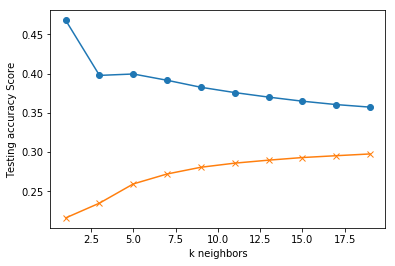

In [332]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [336]:
# # random state 42
# k: 3, Train/Test Score: 0.401/0.238
# k: 5, Train/Test Score: 0.401/0.262

# # random state 41
# k: 3, Train/Test Score: 0.400/0.237
# k: 5, Train/Test Score: 0.402/0.264

# # random state 39
# k: 3, Train/Test Score: 0.399/0.235
# k: 5, Train/Test Score: 0.401/0.261

# # random state 36
# k: 3, Train/Test Score: 0.398/0.235
# k: 5, Train/Test Score: 0.399/0.260